In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from sklearn import datasets

In [23]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [24]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

In [25]:
model = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [26]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from sklearn import  metrics

In [28]:
Y_pred = model.predict(X_test)

In [29]:
print metrics.accuracy_score(Y_pred, Y_test)

0.947368421053


In [30]:
from sklearn import svm

In [31]:
X = iris.data[:,:2]
Y = iris.target
C = 1.0

In [32]:
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)


In [33]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [34]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)

In [35]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [36]:
h = 0.02
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [40]:
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h))
titles = ['SVE with linear kernel','Linear SVC', 'SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel']

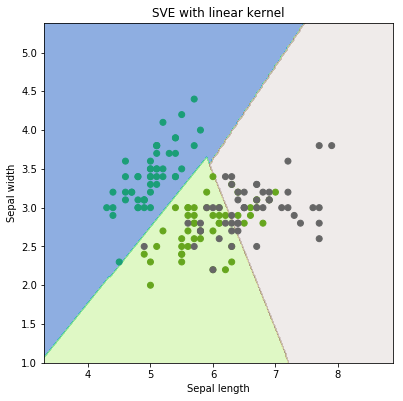

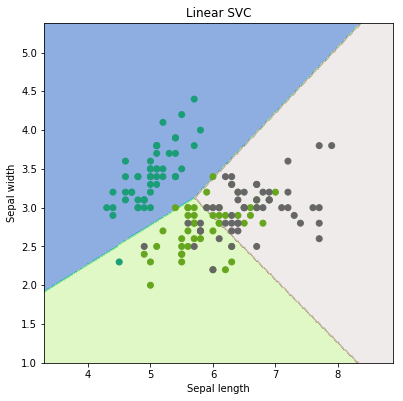

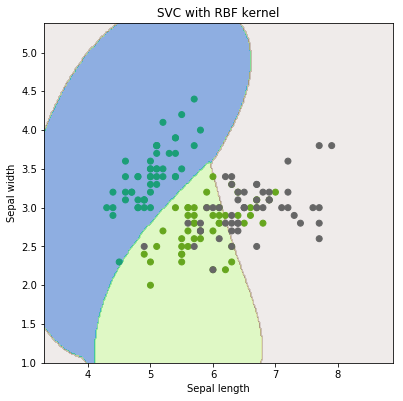

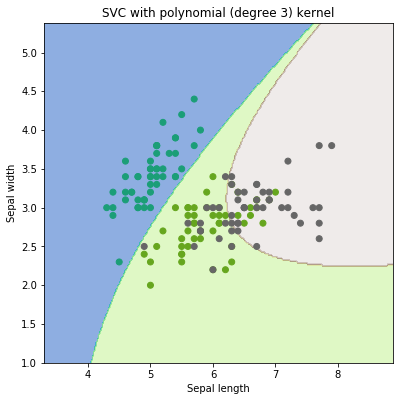

In [41]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain, alpha=0.5, linewidths = 0)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])